In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

<h1>1. How does inevitable expenses on categories like healthcare and education vary with the age?<h1>

In [3]:
df=pd.read_csv("Cleaned_SSA.csv")

In [4]:
bins = [18, 24, 35, 45, 55, 65, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

In [5]:
df['Age_grp'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [6]:
df_grouped = df.groupby('Age_grp', observed=False).agg({
    'Loan Repayment': 'mean',
    'Insurance': 'mean',
    'Groceries': 'mean',
    'Transport': 'mean',
    'Healthcare': 'mean',
    'Education': 'mean'
})
df_grouped = df_grouped.round(2)

In [7]:
display(df_grouped)


plt.figure(figsize=(16, 9))

#df_grouped.to_excel('SSA_Expenses_by_Age.xlsx')

,Loan Repayment,Insurance,Groceries,Transport,Healthcare,Education
Age_grp,,,,,,
18-24,2093.48,1459.44,5256.49,2772.95,1684.98,2493.92
25-34,1914.47,1442.28,5155.04,2669.48,1657.26,2492.38
35-44,2059.61,1448.69,5209.74,2691.23,1656.48,2511.91
45-54,1962.31,1473.98,5234.29,2725.09,1666.97,2513.21
55-64,2075.89,1444.17,5171.06,2683.49,1652.56,2442.19
65+,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

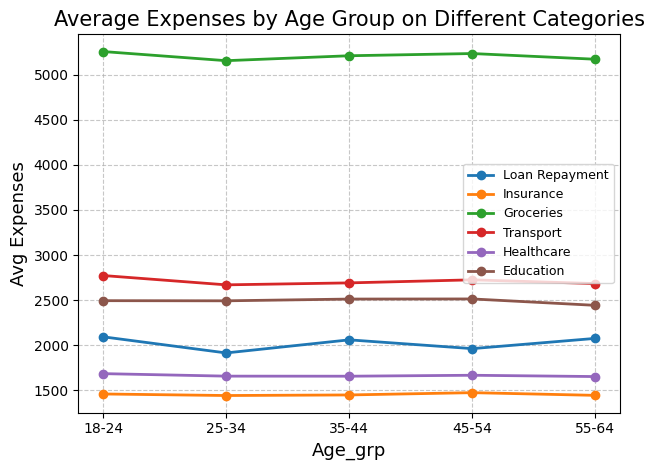

In [8]:
for category in ['Loan Repayment', 'Insurance', 'Groceries', 'Transport', 'Healthcare', 'Education']:
    plt.plot(df_grouped.index, df_grouped[category], label=category, marker='o', linewidth=2)

plt.xlabel('Age_grp', fontsize=13)
plt.ylabel('Avg Expenses', fontsize=13)
plt.title('Average Expenses by Age Group on Different Categories', fontsize=15)
plt.legend(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h1>2. How does spending behavior vary across different occupations?<h1>

In [9]:
occupation_Expenses = df.groupby('Occupation').agg({
    'Loan Repayment': 'mean',
    'Insurance': 'mean',
    'Groceries': 'mean',
    'Transport': 'mean',
    'Healthcare': 'mean',
    'Education': 'mean'
})

In [10]:
occupation_Expenses = occupation_Expenses.round(2)

In [11]:
display(occupation_Expenses)
#occupation_Expenses.to_excel('SSA_Expenses_by_Occupation.xlsx')

,Loan Repayment,Insurance,Groceries,Transport,Healthcare,Education
Occupation,,,,,,
Professional,2015.15,1464.98,5260.40,2735.51,1674.11,2564.65
Retired,1995.78,1419.75,5098.03,2649.51,1627.16,2393.81
Self_Employed,2072.68,1466.52,5226.35,2710.41,1672.60,2505.01
Student,1972.06,1460.82,5216.04,2714.09,1673.23,2497.95


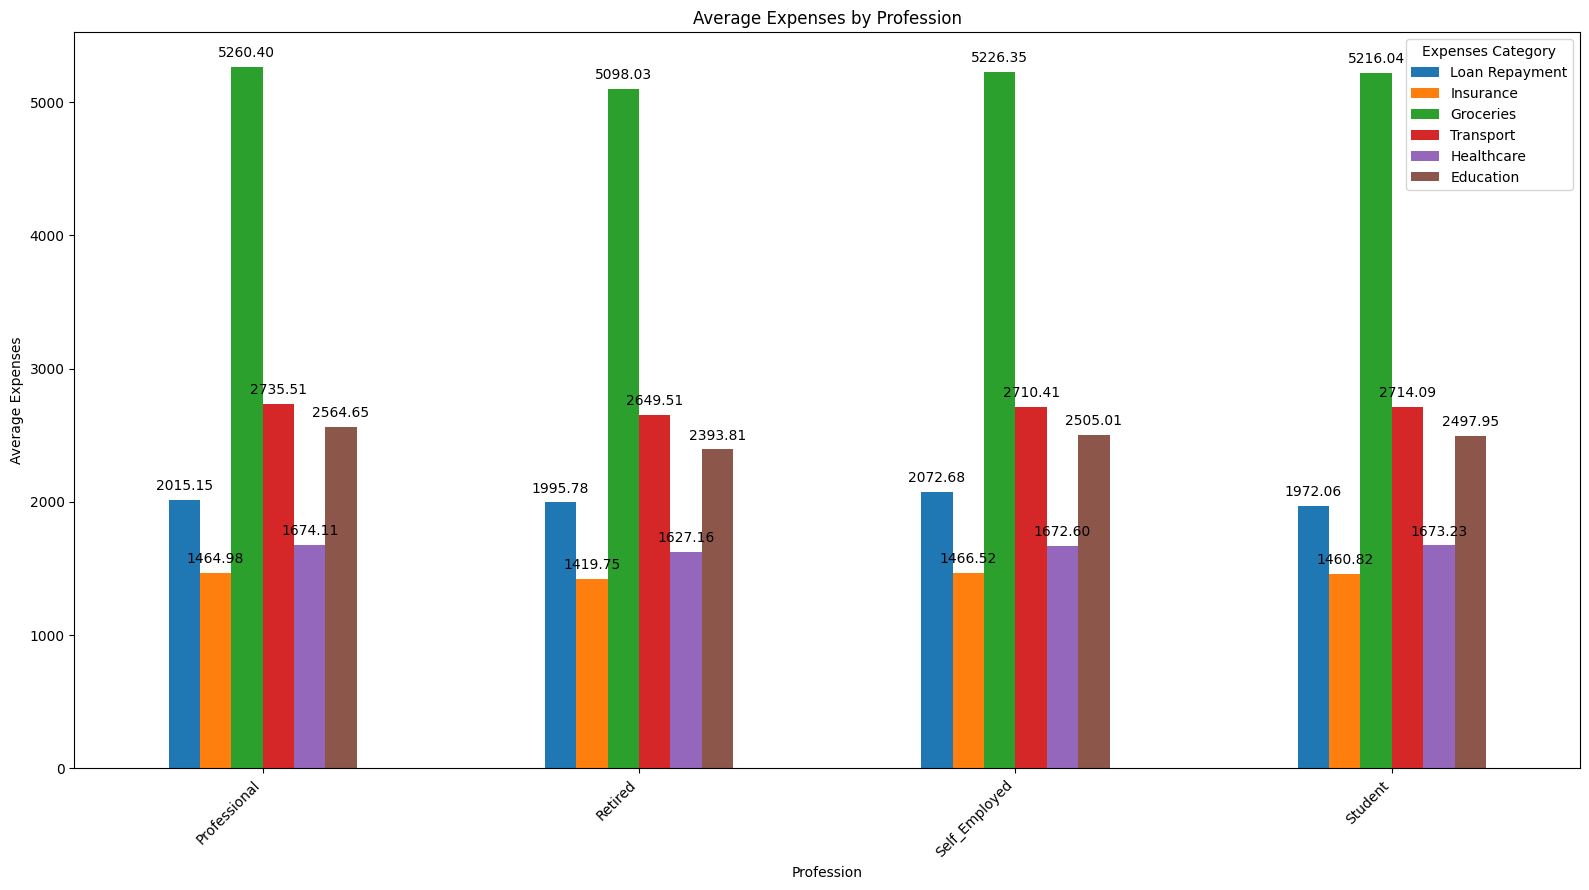

In [12]:
ax = occupation_Expenses.plot(kind='bar', figsize=(16, 9))
plt.title('Average Expenses by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Expenses')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Expenses Category')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

<H1>3. Which Occupation is likely to spend least on non-essesntial expenses? <h1>

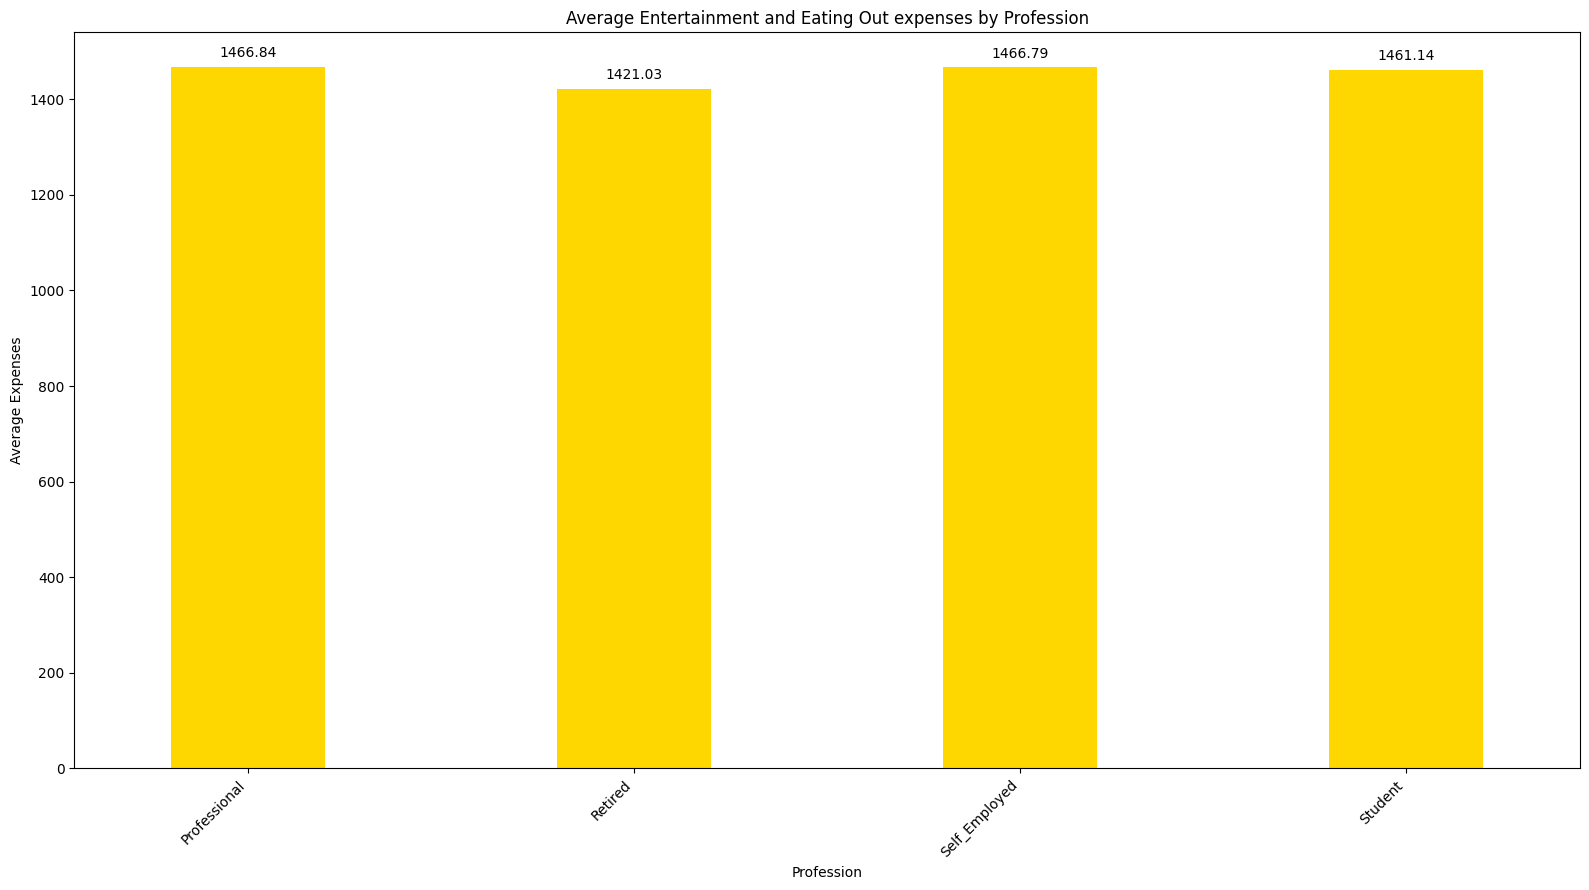

In [13]:
df['AVG_avoidable_expenses'] = df[['Entertainment', 'Eating Out']].mean(axis=1)
profession_entertainment = df.groupby('Occupation')['AVG_avoidable_expenses'].mean().round(2)

ax = profession_entertainment.plot(kind='bar', figsize=(16, 9), color='gold', width=0.4)
plt.title('Average Entertainment and Eating Out expenses by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Expenses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()


<h1>4. What percentage of individuals have savings below threshold? <h1>

Savings Threshold: 3822.64


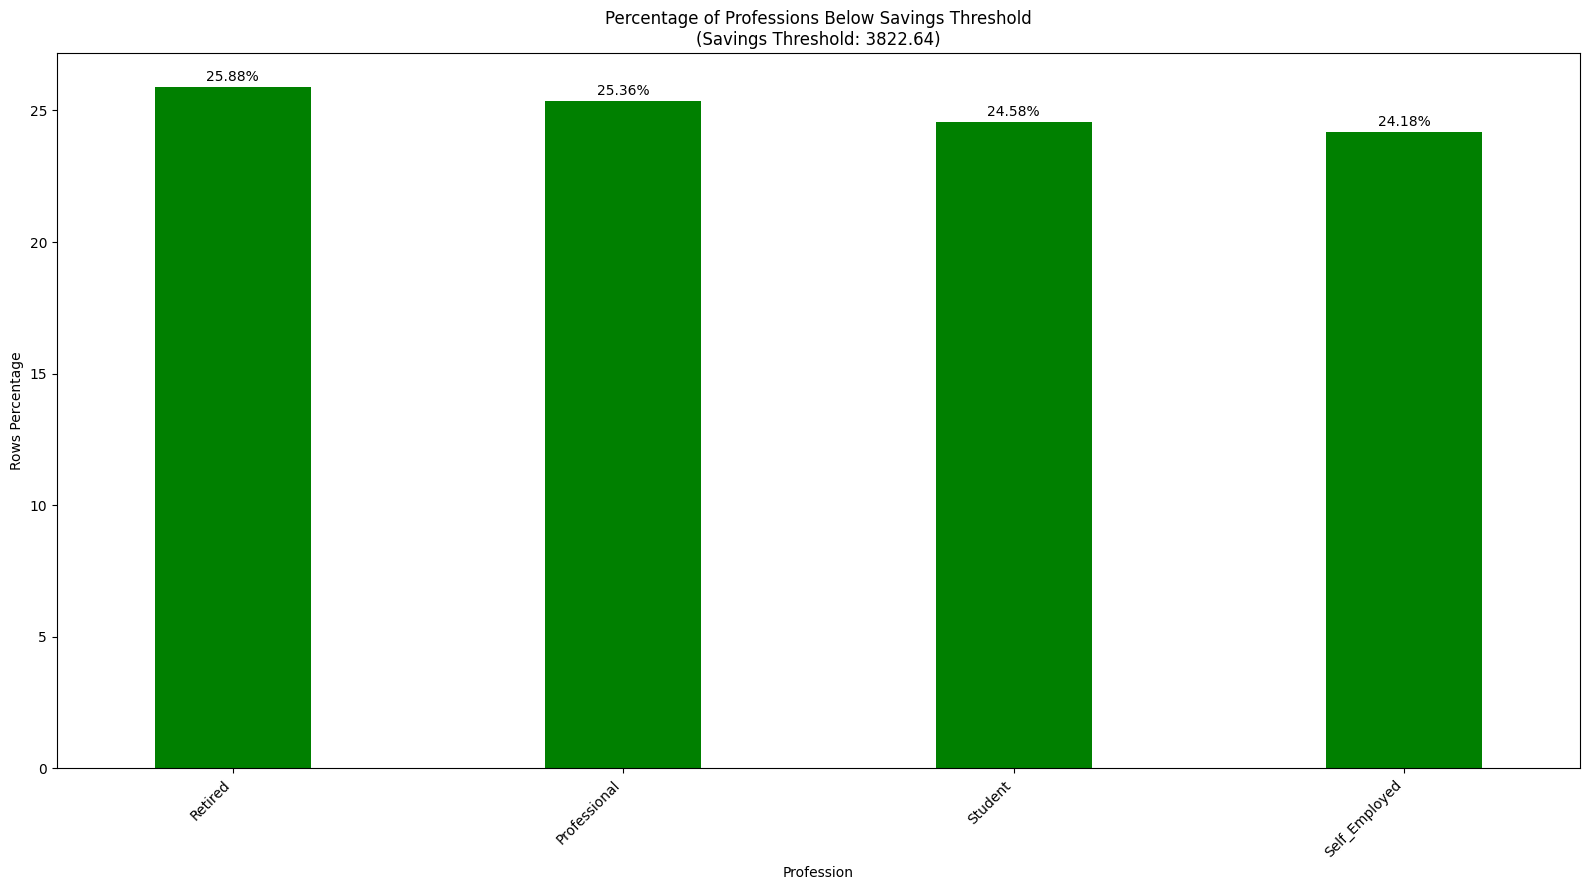

In [14]:
savings_threshold = df['Savings'].quantile(0.25)
print(f"Savings Threshold: {savings_threshold:.2f}")

below_threshold = df[df['Savings'] < savings_threshold]['Occupation'].value_counts(normalize=True) * 100

ax = below_threshold.plot(kind='bar', figsize=(16, 9), color='green', width=0.4)
plt.title(f'Percentage of Professions Below Savings Threshold\n(Savings Threshold: {savings_threshold:.2f})')
plt.xlabel('Profession')
plt.ylabel('Rows Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

<h1>5. Which categories offer the most potential for reducing non-essestial expenses <h1>

Total Avg Potential Savings on Eating Out: 254.72
Total Avg Potential Savings on Entertainment: 253.82
        Potential Savings Entertainment              \
                                   mean         sum   
Age_grp                                               
1-24                             256.43   663379.60   
25-34                            249.01  1133479.69   
35-44                            257.04  1093699.94   
45-54                            252.41  1057608.64   
55-64                            255.54  1099853.80   
65+                                 NaN        0.00   

        Potential Savings Eating Out              
                                mean         sum  
Age_grp                                           
1-24                          261.45   676379.60  
25-34                         250.30  1139379.88  
35-44                         254.30  1082045.61  
45-54                         257.32  1078155.27  
55-64                         253.23  108990

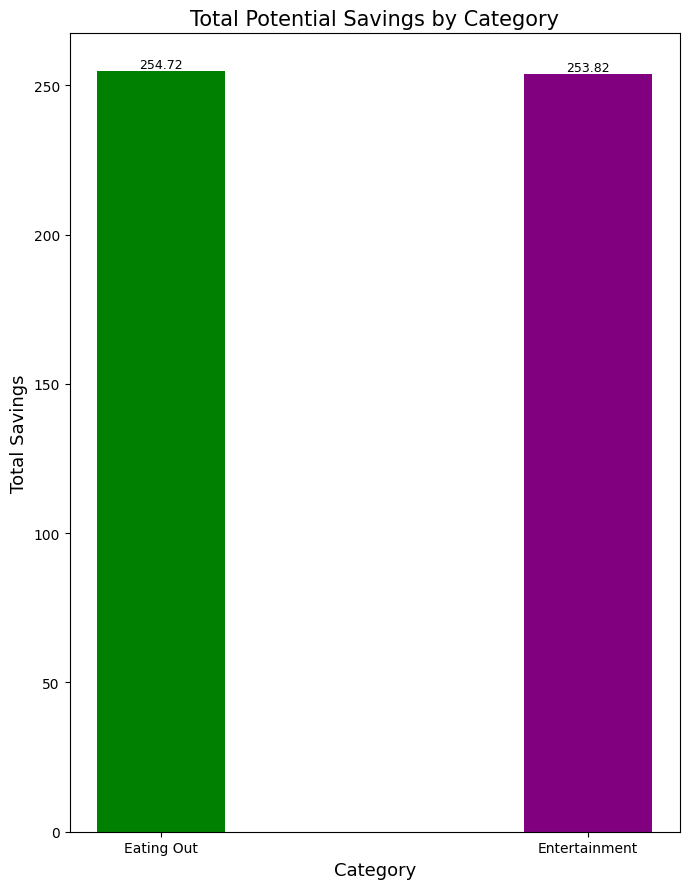

In [19]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
bins = [1, 24, 35, 45, 55, 65, float('inf')]
labels = ['1-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_grp'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

eating_out_Total_savings = round(df['Potential Savings Eating Out'].mean(), 2)
entertainment_Total_savings = round(df['Potential Savings Entertainment'].mean(), 2)

print(f"Total Avg Potential Savings on Eating Out: {eating_out_Total_savings:.2f}")
print(f"Total Avg Potential Savings on Entertainment: {entertainment_Total_savings:.2f}")

grp_analysis = df.groupby('Age_grp', observed=False)[['Potential Savings Entertainment', 'Potential Savings Eating Out']].agg(['mean', 'sum'])
grouped_analysis = grp_analysis.round(2)
print(grouped_analysis)


savings_categories = ['Eating Out', 'Entertainment']
total_savings = [eating_out_Total_savings, entertainment_Total_savings]
plt.figure(figsize=(7, 9))
plt.bar(savings_categories, total_savings, color=['green', 'purple'], width=0.3)
plt.title('Total Potential Savings by Category', fontsize=15)
plt.ylabel('Total Savings', fontsize=13)
plt.xlabel('Category', fontsize=13)
plt.tight_layout()
for index, value in enumerate(total_savings):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=9)
plt.show()



<h1> 6. Which expense categories can be traded off when Saving is low?<h1>

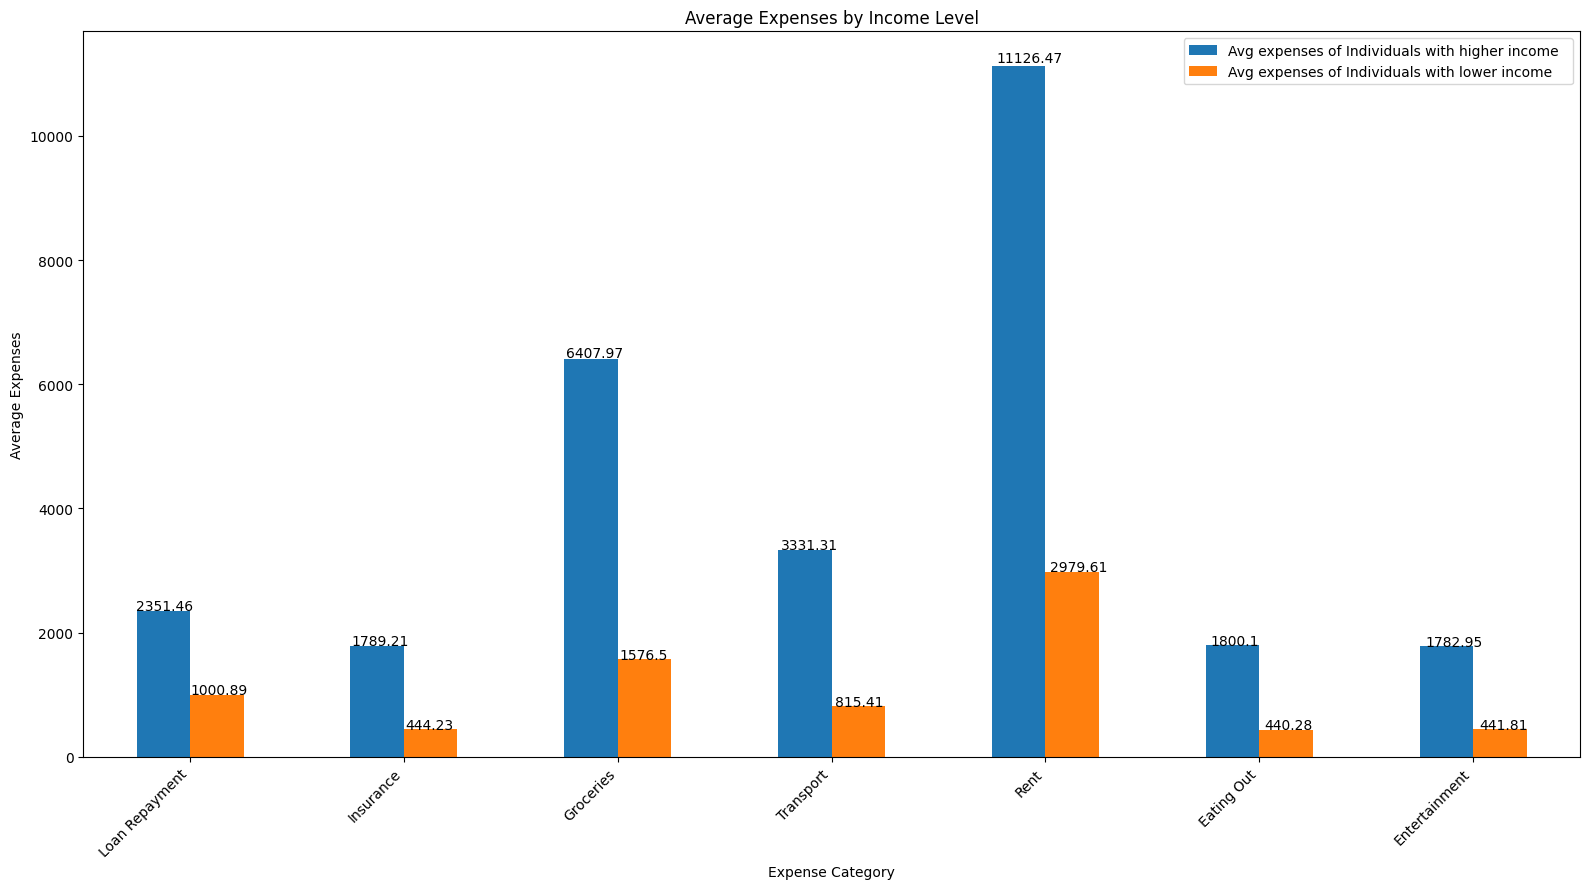

In [16]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Total Expenses'] = df['Loan Repayment'] + df['Insurance'] + df['Groceries'] + df['Transport'] + df['Rent'] + df['Eating Out'] + df['Entertainment']
df['saving'] = df['Income'] - df['Total Expenses']
low_income_threshold = df['saving'].quantile(0.25)
df['Low Income'] = df['saving'] <= low_income_threshold

expense_patterns = df.groupby('Low Income')[['Loan Repayment', 'Insurance', 'Groceries', 'Transport', 'Rent', 'Eating Out', 'Entertainment']].mean()
for col in ['Loan Repayment', 'Insurance', 'Groceries', 'Transport', 'Rent', 'Eating Out', 'Entertainment']:
    expense_patterns[col] = expense_patterns[col].map(lambda x: round(x, 2))

expense_patterns = expense_patterns.T.reset_index()

ax = expense_patterns.plot(kind='bar', figsize=(16, 9))
plt.title('Average Expenses by Income Level')
plt.xlabel('Expense Category')
plt.ylabel('Average Expenses')
plt.xticks(range(len(expense_patterns)), expense_patterns['index'].values, rotation=45, ha='right')
plt.legend(['Avg expenses of Individuals with higher income  ', 'Avg expenses of Individuals with lower income '])
plt.tight_layout()
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()
